In [ ]:
pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# Inlet velocity data
inlet_velocity_data = [
    [5.763904177, 5.763904177, 5.763904177, 4.07569573],
    [5.763904177, 5.763904177, 7.05931208, 5.763904177],
    [7.05931208, 7.05931208, 7.05931208, 5.763904177],
    [7.05931208, 7.05931208, 7.05931208, 5.763904177],
    [7.05931208, 7.05931208, 7.05931208, 5.763904177],
    [7.05931208, 7.05931208, 7.05931208, 5.763904177],
    [7.05931208, 7.05931208, 7.05931208, 5.763904177],
    [5.763904177, 5.763904177, 7.05931208, 5.763904177],
    [5.763904177, 5.763904177, 5.763904177, 4.07569573]
]

columns = ['100%', '75%', '50%', '25%']


df = pd.DataFrame(inlet_velocity_data, columns=columns)

print("Inlet Velocity Data (DataFrame):")
print(df)



# Outlet velocity data
outlet_velocity_data = [
    [14.11862416, 12.88848156, 12.22708719, 11.52780835],
    [15.24985703, 14.11862416, 14.69512994, 12.88848156],
    [19.54635006, 19.11670748, 18.67718419, 16.80452399],
    [22.69251344, 22.69251344, 21.56655464, 19.11670748],
    [22.69251344, 22.69251344, 21.56655464, 19.54635006],
    [22.69251344, 22.69251344, 21.56655464, 19.11670748],
    [19.54635006, 19.11670748, 18.67718419, 16.80452399],
    [15.24985703, 14.11862416, 14.69512994, 12.88848156],
    [14.11862416, 12.88848156, 12.22708719, 11.52780835]
]

# Columns
columns = ['100%', '75%', '50%', '25%']

outlet_df = pd.DataFrame(outlet_velocity_data, columns=columns)

print("Outlet Velocity Data (DataFrame):")
print(outlet_df)



Inlet Velocity Data (DataFrame):
       100%       75%       50%       25%
0  5.763904  5.763904  5.763904  4.075696
1  5.763904  5.763904  7.059312  5.763904
2  7.059312  7.059312  7.059312  5.763904
3  7.059312  7.059312  7.059312  5.763904
4  7.059312  7.059312  7.059312  5.763904
5  7.059312  7.059312  7.059312  5.763904
6  7.059312  7.059312  7.059312  5.763904
7  5.763904  5.763904  7.059312  5.763904
8  5.763904  5.763904  5.763904  4.075696
Outlet Velocity Data (DataFrame):
        100%        75%        50%        25%
0  14.118624  12.888482  12.227087  11.527808
1  15.249857  14.118624  14.695130  12.888482
2  19.546350  19.116707  18.677184  16.804524
3  22.692513  22.692513  21.566555  19.116707
4  22.692513  22.692513  21.566555  19.546350
5  22.692513  22.692513  21.566555  19.116707
6  19.546350  19.116707  18.677184  16.804524
7  15.249857  14.118624  14.695130  12.888482
8  14.118624  12.888482  12.227087  11.527808


In [ ]:
# Parameters (taken for 25 degrees celsius)
rho_air = 1.168  # Density of air at standard ambient temperature in kg/m^3
mu_air = 1.849e-5  # Dynamic viscosity of air at 25°C in kg/(m*s) https://www.engineersedge.com/physics/viscosity_of_air_dynamic_and_kinematic_14483.htm
d_orifice_throat = 0.025  # Diameter of the orifice throat in meters from booklet
d_pipe = 0.08  # Diameter of the pipe in meters


# Function to calculate Reynolds number
def reynolds_number(velocity, diameter, viscosity):
    return (rho_air * velocity * diameter) / viscosity

# Function to calculate average velocity
def average_velocity(delta_P):
    return np.sqrt(2 * delta_P / rho_air)

# Function to calculate orifice coefficient Cd
def orifice_coefficient(Q, diameter_ratio, delta_P, throat_area):
    return Q * np.sqrt(rho_air * (1 - diameter_ratio**4)) / (throat_area * np.sqrt(2 * delta_P))

# Function to fit to
def fit(re,a,b):
  return a*re + b

# Data
tap_open_percent = [25, 50, 75, 100]
delta_P = [2.2, 2.7, 2.9, 2.9]  # Pressure drop (mbar)
throat_area = np.pi * (d_orifice_throat / 2)**2  # Throat area of the orifice
pipe_area = np.pi *(d_pipe/2)**2 # Pipe area cross-sectional area

# Velocities
V_100 = 3.2  # Volumetric flow rate for 100% open tap m/s
V_75 = (4/3) * 3.2  # Volumetric flow rate for 75% open tap
V_50 = (2/1) * 3.2  # Volumetric flow rate for 50% open tap
V_25 = 4 * 3.2  # Volumetric flowb rate for 25% open tap

# Calculate average velocities for each flow rate
Q_100 = V_100 *throat_area
Q_75 = V_75 *throat_area
Q_50 = V_50 *throat_area
Q_25 = V_25 *throat_area






In [ ]:
avg_velocities

[19.409078514116104,
 21.501831715537346,
 22.283970527393755,
 22.283970527393755]

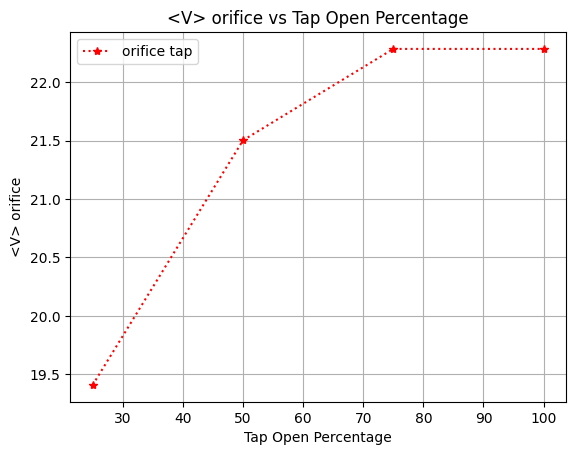

In [ ]:
#5
avg_velocities = []
for dp, Q in zip(delta_P, [Q_25, Q_50, Q_75, Q_100]):
    avg_velocities.append(average_velocity(dp * 100)) # mbar to pascal conversion

plt.plot([25,50,75,100],avg_velocities,"r:*",label="orifice tap")
plt.ylabel("<V> orifice")
plt.xlabel("Tap Open Percentage")
plt.title("<V> orifice vs Tap Open Percentage")
plt.legend()
plt.grid(True)
plt.show()

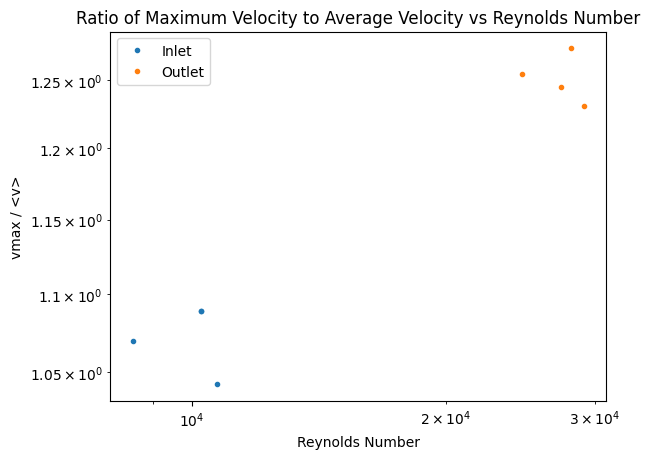

In [ ]:
#6
average_out =[]
max_out = []
average_in =[]
max_in=[]

# Calculate average and maximum velocities for each column
for cols in outlet_df.columns:
    average_out.append(outlet_df[cols].mean())
    average_in.append(df[cols].mean())
    max_out.append(outlet_df[cols].max())
    max_in.append(df[cols].max())

# Calculate vmax / <v> ratios
res_in = [max_in[i] / average_in[i] for i in range(4)]
res_out = [max_out[i] / average_out[i] for i in range(4)]

# Calculate Reynolds numbers for both inlet and outlet
reynolds_numbers_6_in = [reynolds_number(v, d_orifice_throat, mu_air) for v in average_in]
reynolds_numbers_6_out = [reynolds_number(v, d_orifice_throat, mu_air) for v in average_out]

# Plot the ratios vs Reynolds numbers
plt.plot(reynolds_numbers_6_in, res_in, '.', label='Inlet')
plt.plot(reynolds_numbers_6_out, res_out, '.', label='Outlet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Reynolds Number')
plt.ylabel('vmax / <v>')
plt.title('Ratio of Maximum Velocity to Average Velocity vs Reynolds Number')
plt.legend()
plt.show()

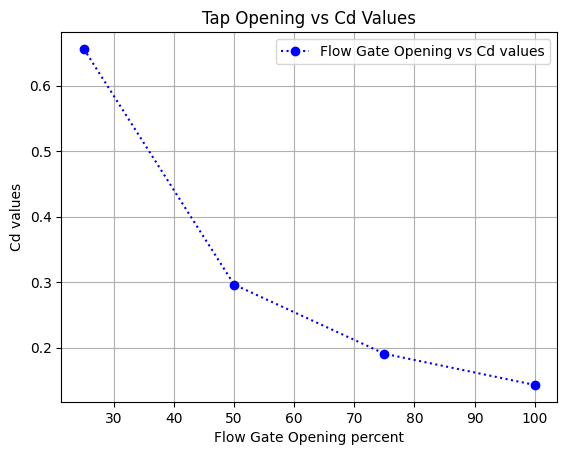

In [ ]:
#7
# Calculate orifice coefficients Cd for each flow rate
diameter_ratio = d_orifice_throat / d_pipe  # Assuming fully open-tap
Cd_values = [orifice_coefficient(Q, diameter_ratio, dp * 100, throat_area) for Q, dp in zip([Q_25, Q_50, Q_75, Q_100], delta_P)]

plt.plot([25,50,75,100],Cd_values,"b:o",label="Flow Gate Opening vs Cd values")
plt.legend()
plt.xlabel("Flow Gate Opening percent")
plt.ylabel("Cd values")
plt.title("Tap Opening vs Cd Values")
plt.grid(True)
plt.show()

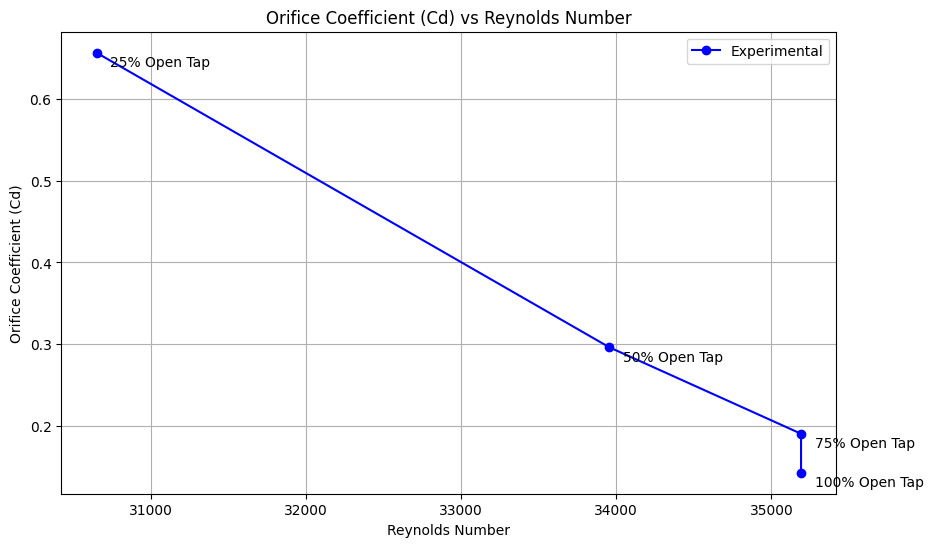

In [ ]:
#8a - from orifice pressure drop
# Calculate Reynolds number for each flow rate
reynolds_numbers = [reynolds_number(v, d_orifice_throat, mu_air) for v in avg_velocities]

# Calculate orifice coefficients Cd for each flow rate
diameter_ratio = d_orifice_throat / d_pipe  # Assuming fully open-tap
Cd_values = [orifice_coefficient(Q, diameter_ratio, dp * 100, throat_area) for Q, dp in zip([Q_25, Q_50, Q_75, Q_100], delta_P)]



# Plots of Cd vs Reynolds number
plt.figure(figsize=(10, 6))
plt.plot(reynolds_numbers, Cd_values, marker='o', linestyle='-', color='b', label='Experimental')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Reynolds Number')
plt.ylabel('Orifice Coefficient (Cd)')
plt.title('Orifice Coefficient (Cd) vs Reynolds Number')
plt.grid(True)
plt.legend()
for i, txt in enumerate(tap_open_percent):
    plt.annotate(str(txt) + '% Open Tap', (reynolds_numbers[i], Cd_values[i]), xytext=(10,-10), textcoords='offset points')
plt.show()

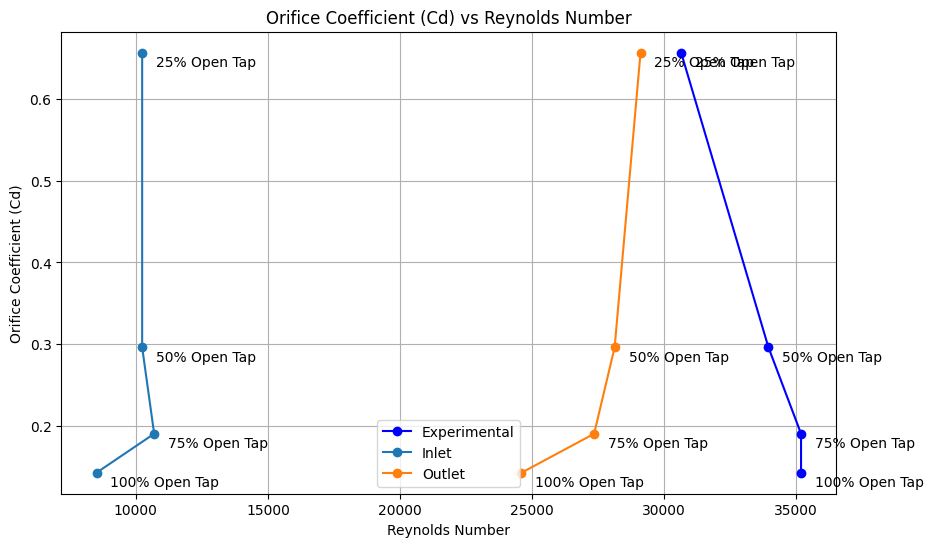

In [ ]:
#8a - from tap velocities
# Calculate Reynolds number for each flow rate
reynolds_numbers = [reynolds_number(v, d_orifice_throat, mu_air) for v in avg_velocities]

# Calculate orifice coefficients Cd for each flow rate
diameter_ratio = d_orifice_throat / d_pipe  # Assuming fully open-tap
Cd_values = [orifice_coefficient(Q, diameter_ratio, dp * 100, throat_area) for Q, dp in zip([Q_25, Q_50, Q_75, Q_100], delta_P)]



# Plots of Cd vs Reynolds number
plt.figure(figsize=(10, 6))
plt.plot(reynolds_numbers, Cd_values, marker='o', linestyle='-', color='b', label='Experimental')
plt.plot(reynolds_numbers_6_in, Cd_values, marker='o', linestyle='-', label='Inlet')
plt.plot(reynolds_numbers_6_out, Cd_values,  marker='o', linestyle='-', label='Outlet')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Reynolds Number')
plt.ylabel('Orifice Coefficient (Cd)')
plt.title('Orifice Coefficient (Cd) vs Reynolds Number')
plt.grid(True)
plt.legend()
for i, txt in enumerate(tap_open_percent):
    plt.annotate(str(txt) + '% Open Tap', (reynolds_numbers[i], Cd_values[i]), xytext=(10,-10), textcoords='offset points')
    plt.annotate(str(txt) + '% Open Tap', (reynolds_numbers_6_in[i], Cd_values[i]), xytext=(10,-10), textcoords='offset points')
    plt.annotate(str(txt) + '% Open Tap', (reynolds_numbers_6_out[i], Cd_values[i]), xytext=(10,-10), textcoords='offset points')
plt.show()

<ipython-input-126-f365d17e4235>:14: RankWarning: Polyfit may be poorly conditioned
  inlet.append(np.polyfit(reynolds_numbers_6_in, Cd_values, degrees[i]))
<ipython-input-126-f365d17e4235>:13: RankWarning: Polyfit may be poorly conditioned
  outlet.append(np.polyfit(reynolds_numbers_6_out, Cd_values, degrees[i]))
<ipython-input-126-f365d17e4235>:14: RankWarning: Polyfit may be poorly conditioned
  inlet.append(np.polyfit(reynolds_numbers_6_in, Cd_values, degrees[i]))
<ipython-input-126-f365d17e4235>:13: RankWarning: Polyfit may be poorly conditioned
  outlet.append(np.polyfit(reynolds_numbers_6_out, Cd_values, degrees[i]))
<ipython-input-126-f365d17e4235>:14: RankWarning: Polyfit may be poorly conditioned
  inlet.append(np.polyfit(reynolds_numbers_6_in, Cd_values, degrees[i]))


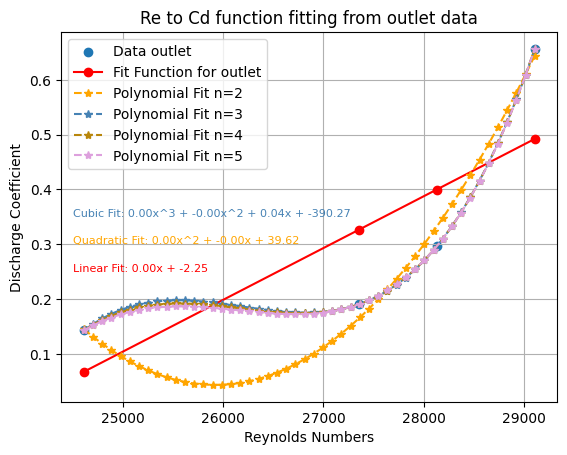

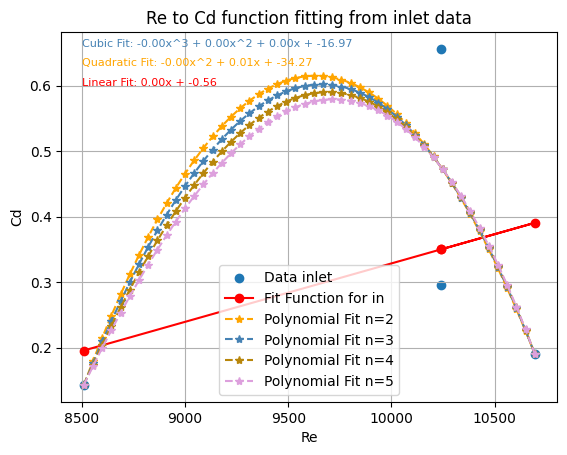

In [ ]:
#q8b

# Perform polynomial fitting to obtain coefficients
degrees = [2,3,4,5]  # Degree of the polynomial
outlet= []
inlet = []
x_values_out = []
x_values_in = []
y_values_outs = []
y_values_ins = []
color_chart = ["orange","steelblue","darkgoldenrod","plum"]
for i in range(len(degrees)):
  outlet.append(np.polyfit(reynolds_numbers_6_out, Cd_values, degrees[i]))
  inlet.append(np.polyfit(reynolds_numbers_6_in, Cd_values, degrees[i]))
  x_values_out.append(np.linspace(np.min(reynolds_numbers_6_out), np.max(reynolds_numbers_6_out), 50))

  x_values_in.append(np.linspace(np.min(reynolds_numbers_6_in), np.max(reynolds_numbers_6_in), 50))

for i in range(4):
  y_values_outs.append(np.polyval(outlet[i], x_values_out[i]))
  y_values_ins.append(np.polyval(inlet[i], x_values_in[i]))

coeffs_out, x = sco.curve_fit(fit,reynolds_numbers_6_out,Cd_values)
coeffs_in, y = sco.curve_fit(fit,reynolds_numbers_6_in,Cd_values)
y_values_out = []
y_values_in= []

# Generate many values from the fit function using the coefficients
for i in range(4):
  y_values_out.append(fit(reynolds_numbers_6_out[i], *coeffs_out))
  y_values_in.append(fit(reynolds_numbers_6_in[i], *coeffs_in))

# Plot the original data and the fit function
plt.figure(1)
plt.scatter(reynolds_numbers_6_out, Cd_values, label='Data outlet')
plt.plot(reynolds_numbers_6_out, y_values_out,marker='o', linestyle='-', color='red', label='Fit Function for outlet')
for i in range(4):
  plt.plot(x_values_out[i], y_values_outs[i],marker = "*",linestyle ="--", color=color_chart[i], label=f'Polynomial Fit n={i+2}')
plt.xlabel('Reynolds Numbers')
plt.ylabel('Discharge Coefficient')
plt.title("Re to Cd function fitting from outlet data")
plt.legend()

# Add text annotations for linear and quadratic fits
plt.text(24500, 0.25, f'Linear Fit: {coeffs_out[0]:.2f}x + {coeffs_out[1]:.2f}', fontsize=8, color='red')
plt.text(24500, 0.3, f'Quadratic Fit: {outlet[0][0]:.2f}x^2 + {outlet[0][1]:.2f}x + {outlet[0][2]:.2f}', fontsize=8, color='orange')
plt.text(24500, 0.35, f'Cubic Fit: {outlet[1][0]:.2f}x^3 + {outlet[1][1]:.2f}x^2 + {outlet[1][2]:.2f}x + {outlet[1][3]:.2f}', fontsize=8, color='steelblue')

plt.grid(True)
plt.figure(2)
plt.scatter(reynolds_numbers_6_in, Cd_values, label='Data inlet')
plt.plot(reynolds_numbers_6_in, y_values_in, marker='o', linestyle='-',color='red', label='Fit Function for in')
for i in range(4):
  plt.plot(x_values_in[i], y_values_ins[i],marker = "*",linestyle ="--", color=color_chart[i], label=f'Polynomial Fit n={i+2}')
plt.xlabel('Re')
plt.ylabel('Cd')
plt.title("Re to Cd function fitting from inlet data")
# Add text annotations for linear and quadratic fits
plt.text(8500, 0.6, f'Linear Fit: {coeffs_in[0]:.2f}x + {coeffs_in[1]:.2f}', fontsize=8, color='red')
plt.text(8500, 0.63, f'Quadratic Fit: {inlet[0][0]:.2f}x^2 + {inlet[0][1]:.2f}x + {inlet[0][2]:.2f}', fontsize=8, color='orange')
plt.text(8500, 0.66, f'Cubic Fit: {inlet[1][0]:.2f}x^3 + {inlet[1][1]:.2f}x^2 + {inlet[1][2]:.2f}x + {inlet[1][3]:.2f}', fontsize=8, color='steelblue')
plt.legend()
plt.grid(True)
plt.show()


[array([ 5.89096705e-08, -3.05373948e-03,  3.96180503e+01]),
 array([ 2.17921819e-11, -1.71173397e-06,  4.47912112e-02, -3.90267412e+02]),
 array([ 3.76225424e-16, -1.92932465e-11, -3.13346161e-08,  1.42853727e-02,
        -1.82878791e+02])]

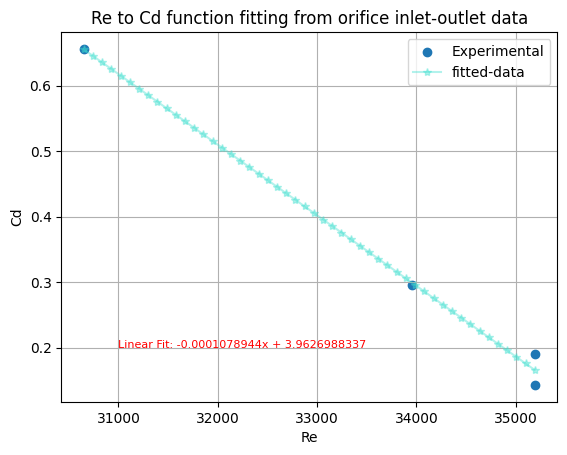

In [ ]:
a = np.polyfit(reynolds_numbers, Cd_values, 1)

t= np.linspace(np.min(reynolds_numbers), np.max(reynolds_numbers), 50)
b = np.polyval(a, t)
plt.scatter(reynolds_numbers, Cd_values, label='Experimental')
plt.plot(t,b, marker='*', linestyle='-', color='turquoise',label= "fitted-data",alpha = 0.4)
plt.text(31000, 0.2, f'Linear Fit: {a[0]:.10f}x + {a[1]:.10f}', fontsize=8, color='red')
plt.xlabel('Re')
plt.ylabel('Cd')
plt.title("Re to Cd function fitting from orifice inlet-outlet data")
plt.grid(True)
plt.legend()
plt.show()

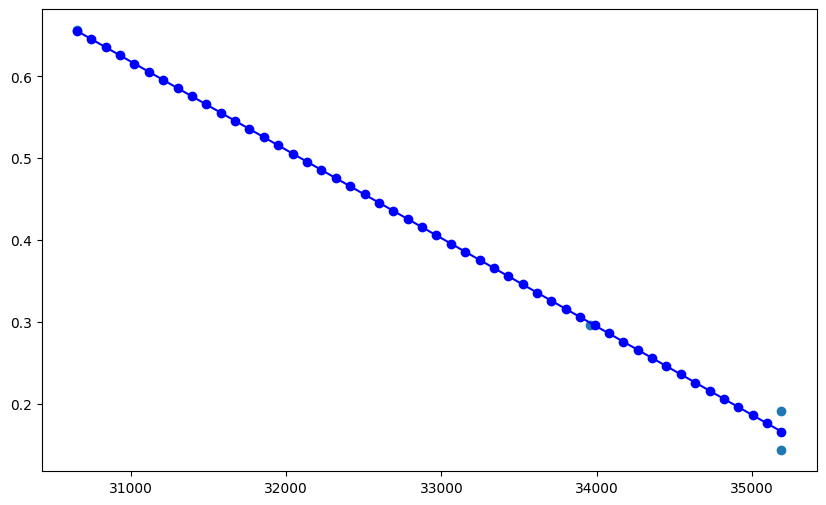

In [ ]:

plt.figure(figsize=(10, 6))


In [ ]:
coeffs_in

array([ 8.93351187e-05, -5.64740152e-01])

In [ ]:
reynolds_numbers

[30651.43821591077, 33956.3810759162, 35191.559729578024, 35191.559729578024]

In [ ]:
avg_velocities

[19.409078514116104,
 21.501831715537346,
 22.283970527393755,
 22.283970527393755]